<a href="https://colab.research.google.com/github/amritha-code/amritha-code/blob/main/Construct_week_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***MACHINE LEARNING CONSTRUCT WEEK PROJECT***
# ***PREDICTING VACATION PREFERENCES : MOUNTAINS vs BEACHES***

In [38]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [39]:

# Load the dataset
data = pd.read_csv('/content/mountains_vs_beaches_preferences.csv')

In [40]:
#Display the first 5 rows
data.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0


In [41]:
#Shape of the dataset
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns")

data.info()

Dataset contains 52444 rows and 14 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     52444 non-null  int64 
 1   Gender                  52444 non-null  object
 2   Income                  52444 non-null  int64 
 3   Education_Level         52444 non-null  object
 4   Travel_Frequency        52444 non-null  int64 
 5   Preferred_Activities    52444 non-null  object
 6   Vacation_Budget         52444 non-null  int64 
 7   Location                52444 non-null  object
 8   Proximity_to_Mountains  52444 non-null  int64 
 9   Proximity_to_Beaches    52444 non-null  int64 
 10  Favorite_Season         52444 non-null  object
 11  Pets                    52444 non-null  int64 
 12  Environmental_Concerns  52444 non-null  int64 
 13  Preference              52444 non-null  int64 
dtypes: int64(9)

# ***Data Cleaning and Preprocessing***




In [42]:
#Check for missing values
data.isnull().sum()

,0
Age,0
Gender,0
Income,0
Education_Level,0
Travel_Frequency,0
Preferred_Activities,0
Vacation_Budget,0
Location,0
Proximity_to_Mountains,0
Proximity_to_Beaches,0


In [43]:
# Encode categorical variables
# Label Encoding for binary variables
binary_cols = ['Pets', 'Environmental_Concerns']
for col in binary_cols:
    data[col] = data[col].astype(int)


In [44]:
# Label Encoding for categorical columns with multiple categories
label_enc_cols = ['Gender', 'Education_Level', 'Preferred_Activities', 'Location', 'Favorite_Season']
le = LabelEncoder()
for col in label_enc_cols:
   data[col] = le.fit_transform(data[col])

In [45]:
# Scale numerical features
scaler = StandardScaler()
num_cols = ['Age', 'Income', 'Travel_Frequency', 'Vacation_Budget', 'Proximity_to_Mountains', 'Proximity_to_Beaches']
data[num_cols] = scaler.fit_transform(data[num_cols])

# ***Exploratory Data Analysis (EDA)***

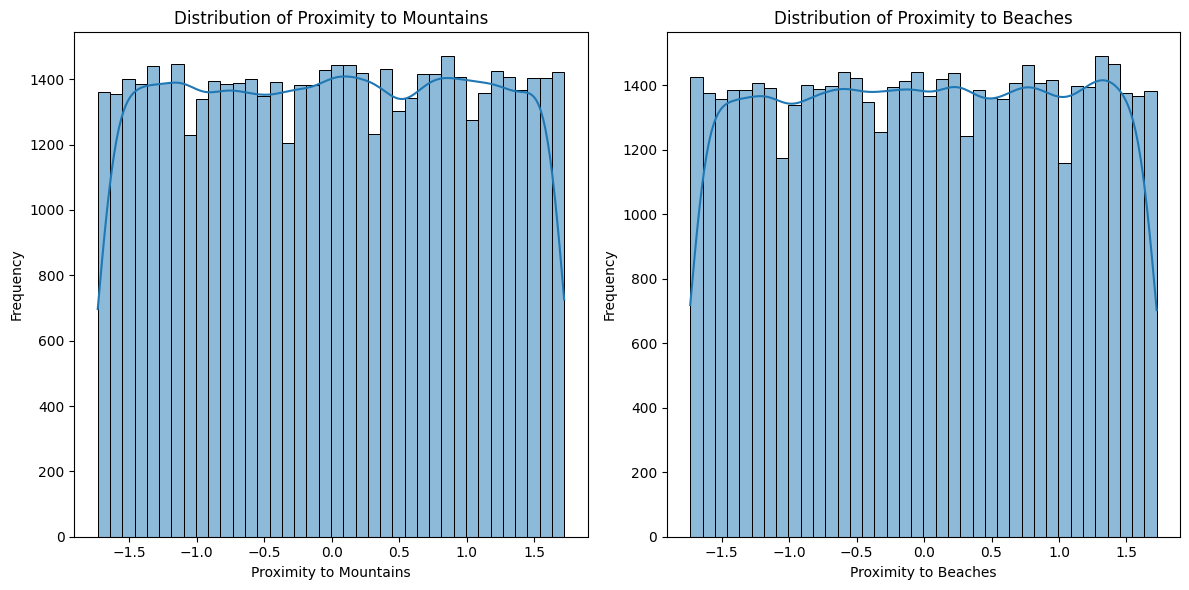

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['Proximity_to_Mountains'], kde=True)  #kde adds a kernel density estimate
plt.title('Distribution of Proximity to Mountains')
plt.xlabel('Proximity to Mountains')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
sns.histplot(data['Proximity_to_Beaches'], kde=True)
plt.title('Distribution of Proximity to Beaches')
plt.xlabel('Proximity to Beaches')
plt.ylabel('Frequency')

plt.tight_layout() # Adjusts subplot params for a tight layout.
plt.show()

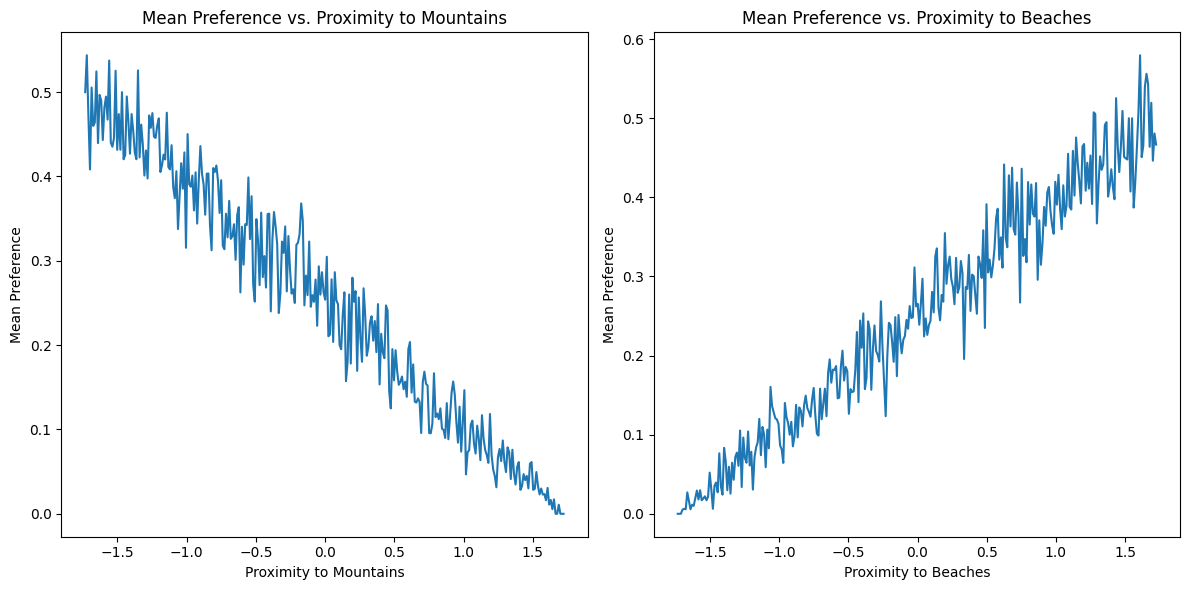

In [47]:
# Analyze the influence of proximity to mountains and beaches on preference
# Calculate the mean preference for different proximity levels
mountain_preference = data.groupby('Proximity_to_Mountains')['Preference'].mean()
beach_preference = data.groupby('Proximity_to_Beaches')['Preference'].mean()


# Further analysis could involve:
# - Correlation analysis between proximity and preference
# - Regression analysis to model the relationship

# Plotting mean preferences
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(mountain_preference.index, mountain_preference.values)
plt.title('Mean Preference vs. Proximity to Mountains')
plt.xlabel('Proximity to Mountains')
plt.ylabel('Mean Preference')

plt.subplot(1, 2, 2)
plt.plot(beach_preference.index, beach_preference.values)
plt.title('Mean Preference vs. Proximity to Beaches')
plt.xlabel('Proximity to Beaches')
plt.ylabel('Mean Preference')


plt.tight_layout()
plt.show()

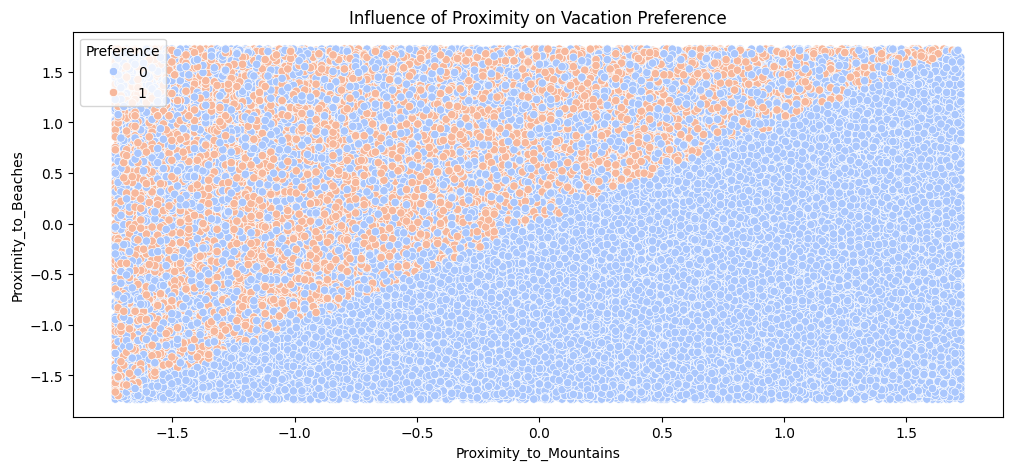

In [48]:
# Influence of proximity on preference
plt.figure(figsize=(12, 5))
sns.scatterplot(data=data, x="Proximity_to_Mountains", y="Proximity_to_Beaches", hue="Preference", palette="coolwarm")
plt.title("Influence of Proximity on Vacation Preference")
plt.show()


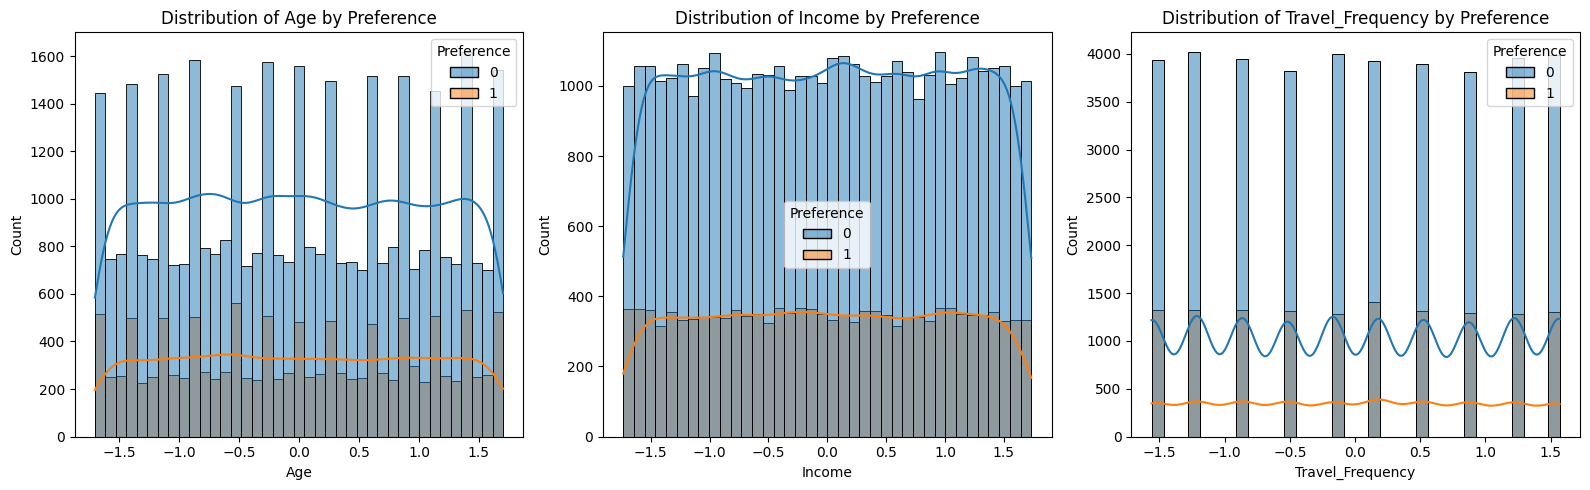

In [49]:
# Distribution of preferences by age, income, and travel frequency
plt.figure(figsize=(16, 5))  # Initialize the figure with a specified size

# Loop through columns and create subplots
for i, col in enumerate(['Age', 'Income', 'Travel_Frequency'], start=1):
    plt.subplot(1, 3, i)  # Define a 1x3 grid for subplots, place the plot in the i-th position
    sns.histplot(data=data, x=col, hue="Preference", kde=True)  # Plot with seaborn's histplot
    plt.title(f'Distribution of {col} by Preference')  # Title for each subplot

# Show all subplots together
plt.tight_layout()  # Optional: Adjust subplot parameters to give padding
plt.show()


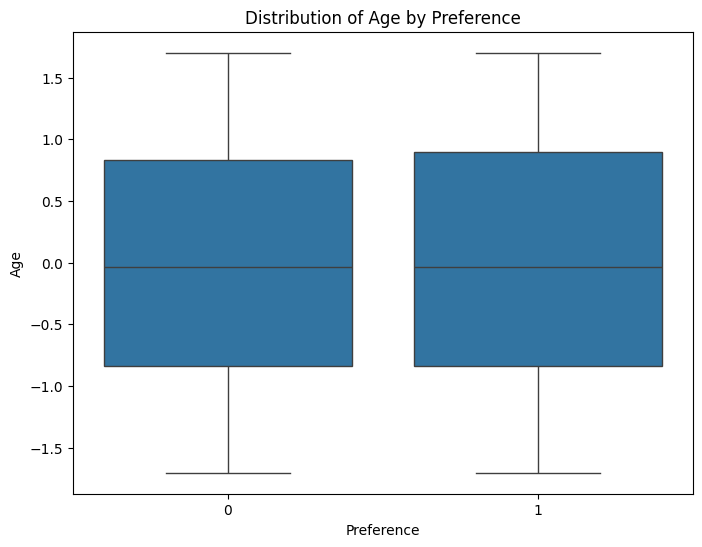

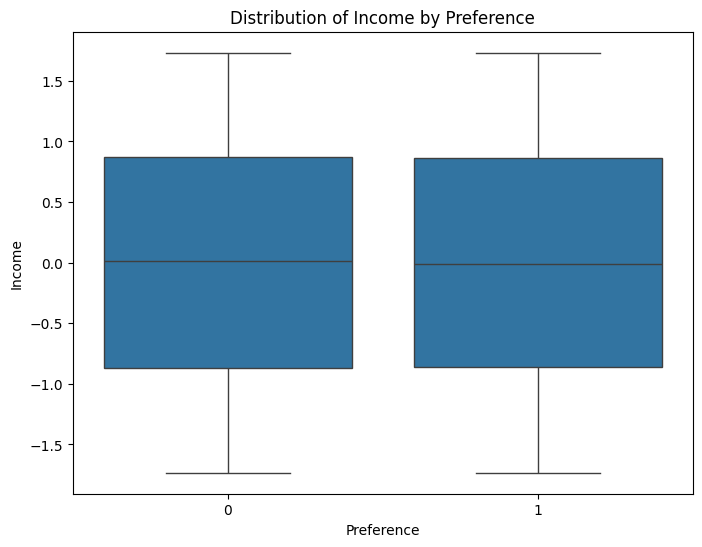

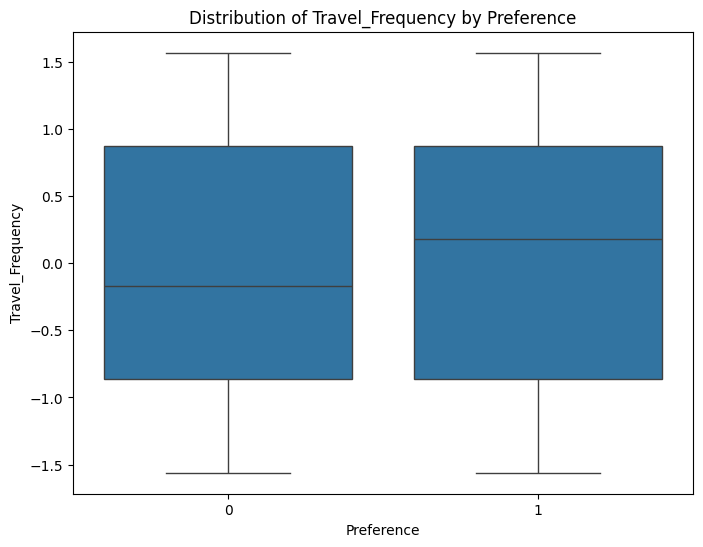

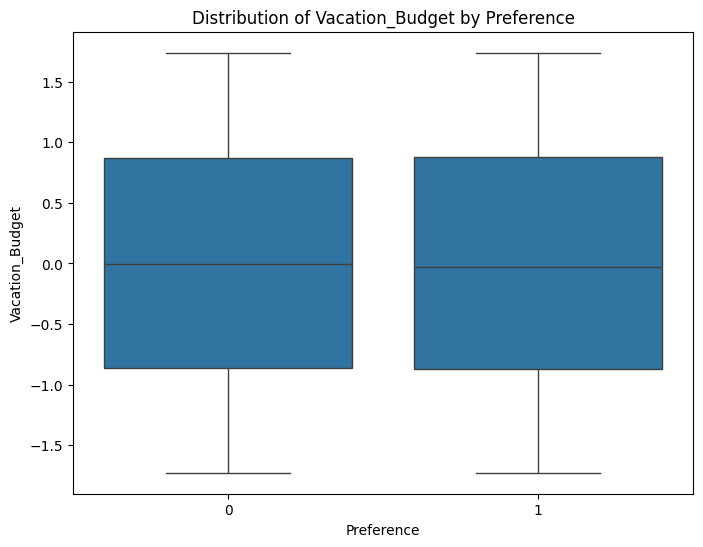

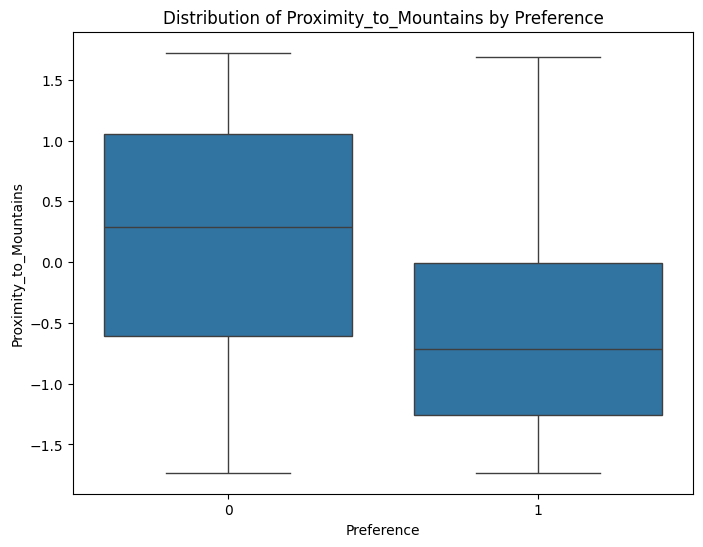

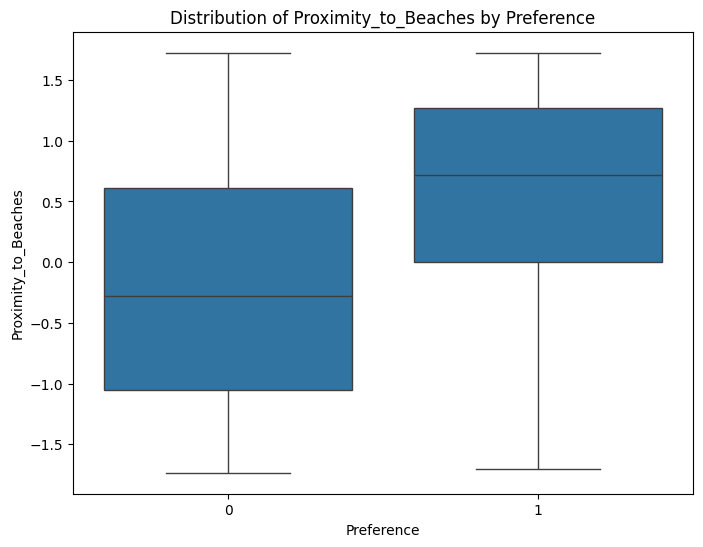

In [51]:
# 2.  Relationship of other features and Preference
# Box plots for numerical features against Preference
numerical_features = ['Age', 'Income', 'Travel_Frequency', 'Vacation_Budget', 'Proximity_to_Mountains', 'Proximity_to_Beaches']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Preference', y=feature, data=data)
    plt.title(f'Distribution of {feature} by Preference')
    plt.show()

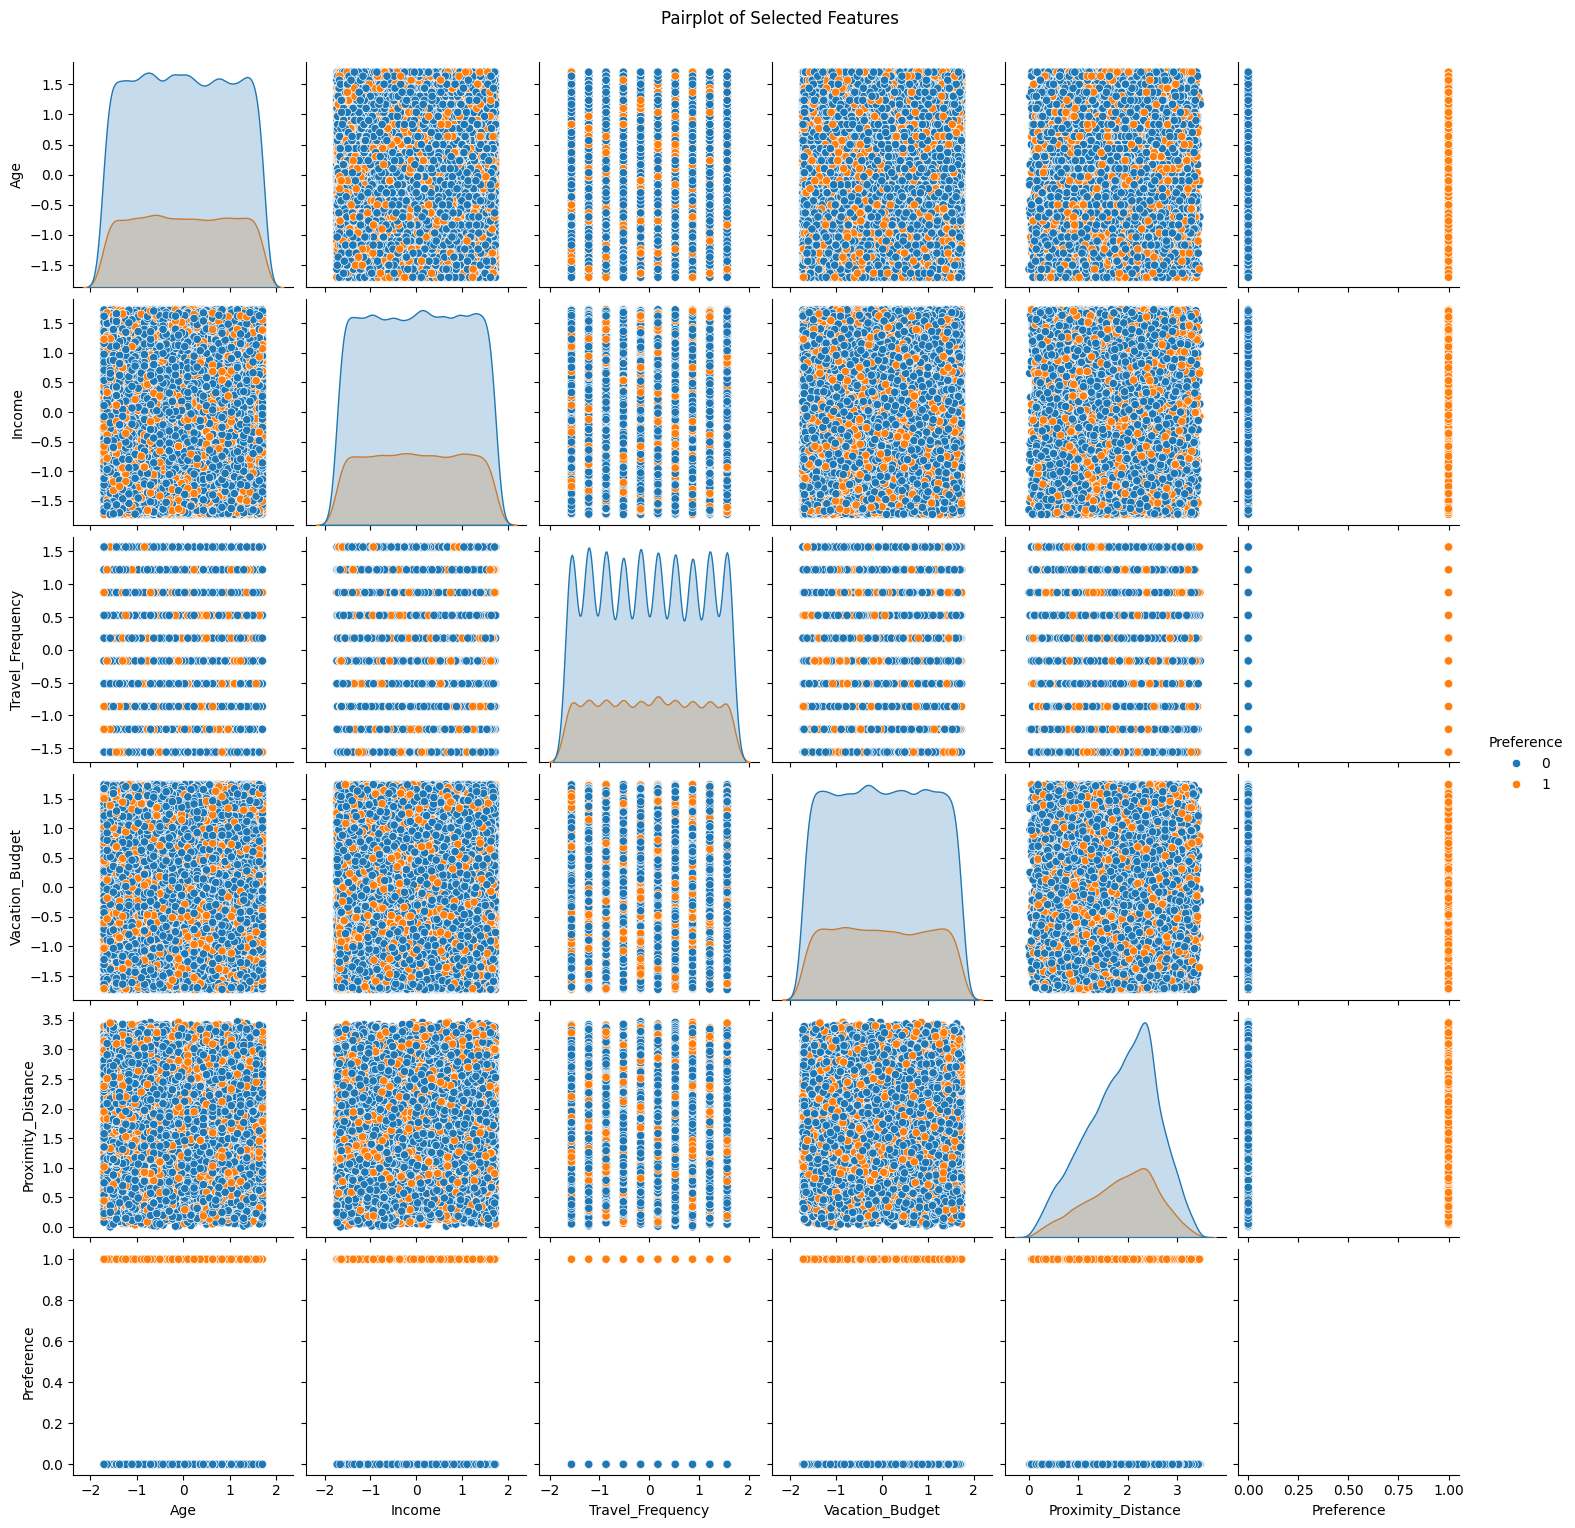

In [36]:
# 3.  Pairplot to visualize relationships among multiple features and Preference
# Selected a subset of features for clarity
sns.pairplot(data, vars=['Age', 'Income', 'Travel_Frequency', 'Vacation_Budget', 'Proximity_Distance', 'Preference'], hue='Preference')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

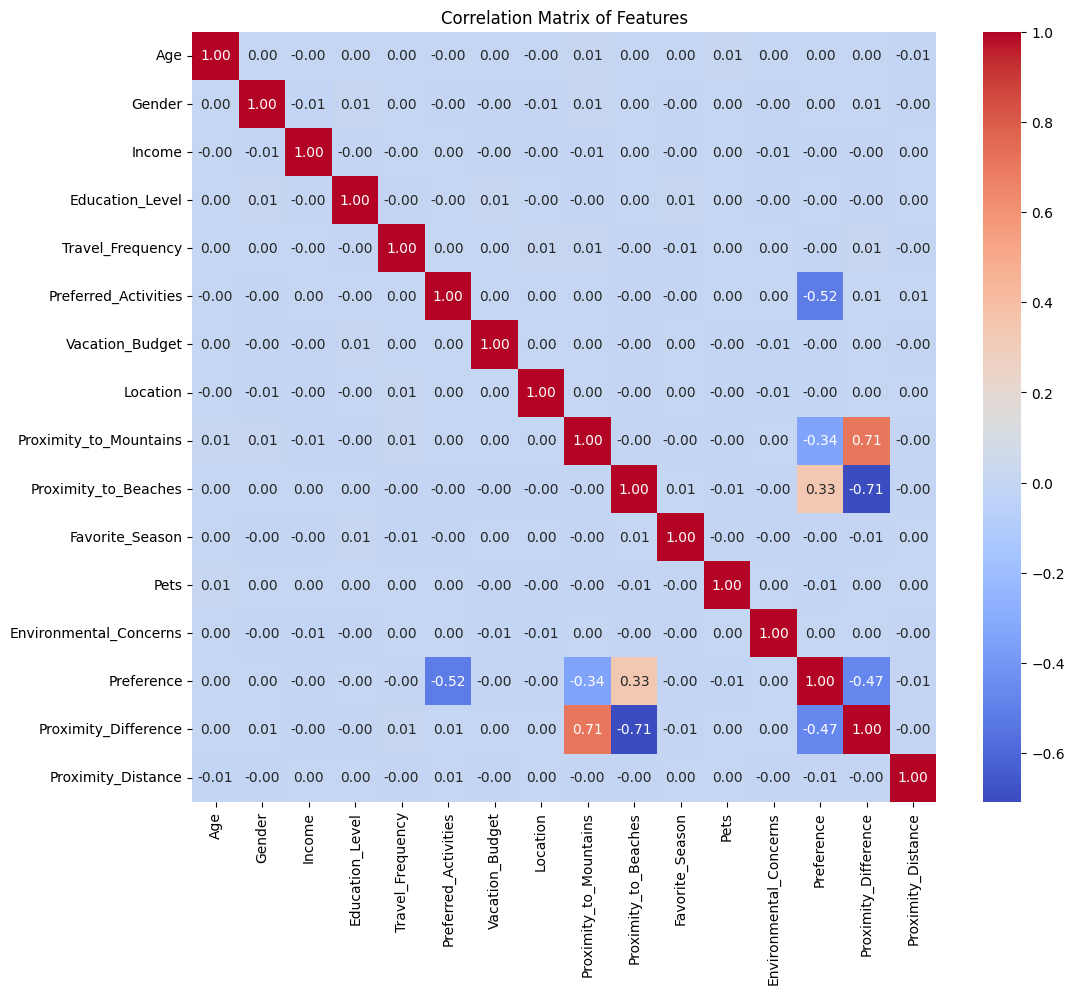

In [37]:
# 4. Heatmap for correlation matrix
# Calculate the correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

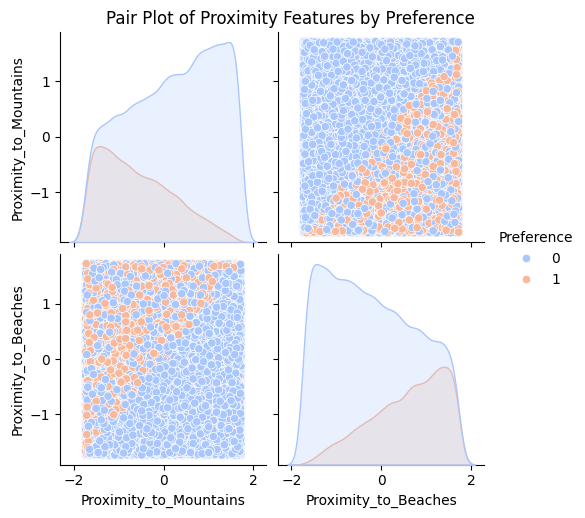

In [52]:
# Pair plot to show relationships of proximity and other features by preference
sns.pairplot(data, vars=['Proximity_to_Mountains', 'Proximity_to_Beaches'],
             hue="Preference", palette="coolwarm", height=2.5)
plt.suptitle("Pair Plot of Proximity Features by Preference", y=1.02)
plt.show()


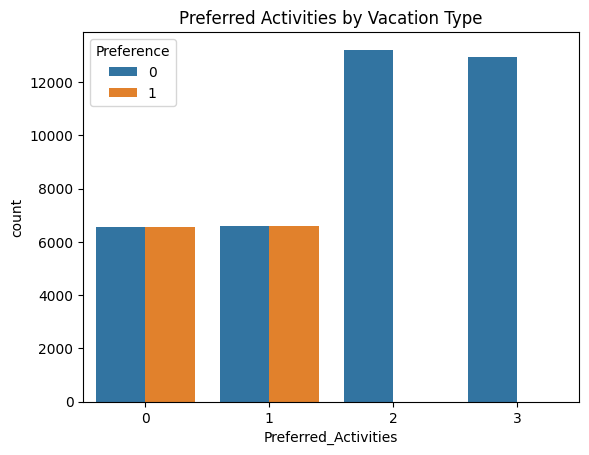

In [56]:
# Preferred activities for each type of vacation preference
sns.countplot(data=data, x="Preferred_Activities", hue="Preference")
plt.title("Preferred Activities by Vacation Type")
plt.show()


# ***Feature Engineering***

In [ ]:
# Interaction feature: Difference between Proximity to Mountains and Proximity to Beaches
data['Proximity_Difference'] = data['Proximity_to_Mountains'] - data['Proximity_to_Beaches']


In [ ]:
#Distance-based Feature (Euclidean distance)
data['Proximity_Distance'] = ((data['Proximity_to_Mountains'] - data['Proximity_to_Beaches'])**2 + (data['Proximity_to_Mountains'] + data['Proximity_to_Beaches'])**2)**0.5


# ***Model Development***

In [ ]:
# Define target and features
X = data.drop(columns=["Preference"])
y = data["Preference"]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize models
models = {
"Logistic Regression": LogisticRegression(),
"Decision Tree": DecisionTreeClassifier(),
"Random Forest": RandomForestClassifier()
}

# ***Model Evaluation***

In [ ]:
# Check for overfitting with cross-validation
for model_name, model in models.items():
     cv_scores = cross_val_score(model, X, y, cv=5)
print(f"{model_name} Cross-Validation Accuracy: {cv_scores.mean()}")

In [ ]:
# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Ensure each model is fitted
    y_pred = model.predict(X_test)
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\n")


In [ ]:
# Feature Importance for Random Forest
if "Random Forest" in models:
    rf_model = models["Random Forest"]  # Retrieve the fitted Random Forest model
    feature_importance = rf_model.feature_importances_
    feature_names = X.columns
    feature_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
    feature_df = feature_df.sort_values(by="Importance", ascending=False)

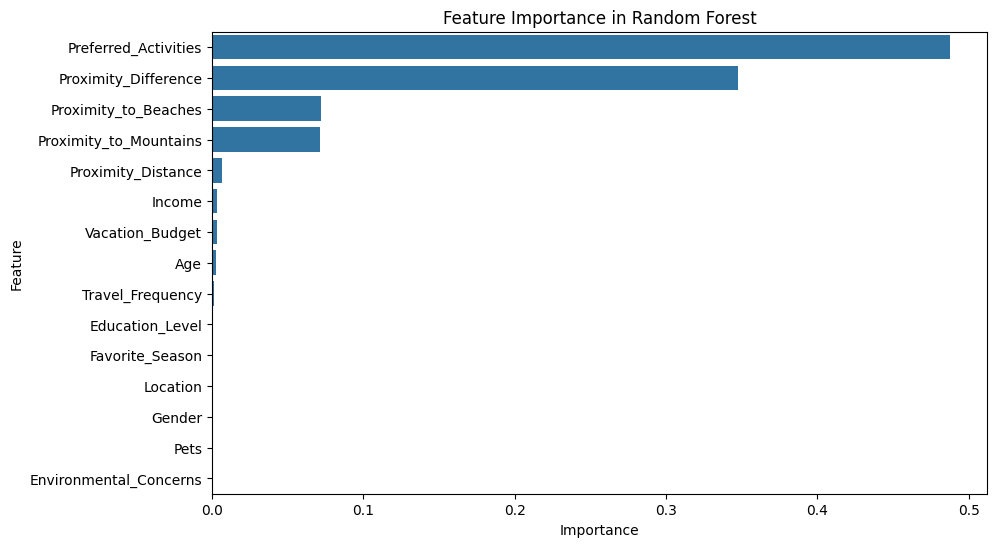

In [58]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_df, x="Importance", y="Feature")
plt.title("Feature Importance in Random Forest")
plt.show()